# 옷 분류하기
**"이미지 파일을 입력하면 어떤 옷인지 판단해주는 프로그램 만들기"**

## 1 데이터 불러오기

### 1-1 모듈 불러오기

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


### 1-2 fashion_mnist 데이터셋 가져오기

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# 나중에 쓸 컬럼 하나 생성해두기
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shift', 'Sneaker', 'Bag', 'Ankle boot']

## 2 데이터 탐색

불러온 데이터가 어떻게 생겼는지를 알아야 활용하지

In [4]:
train_images.shape # 6만개, 28x28 넘파이 배열(784)

(60000, 28, 28)

In [5]:
train_labels.shape # 6만개, 한줄짜리 배열

(60000,)

In [6]:
train_labels[:20] # 배열 내용 20개정도만 보니 대충 0~9가 있음을 확인

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

In [7]:
test_images.shape # 훈련용 6만개, 테스트용 1만개 잘 가져온 것 확인

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

## 3 데이터 전처리

불러온 데이터셋 4개가 각각 어떻게 생겼는지는 알겠다.   
이제 데이터셋의 데이터가 어떤 형식인지를 알아보자   
여기서 전처리는 정규화 뿐이었네

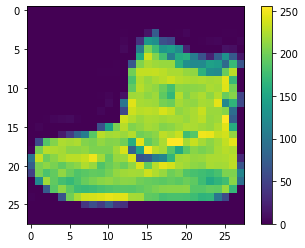

In [9]:
# 첫번째 데이터를 꺼내서 확인
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() # 왼쪽 컬러바를 보고 0 ~ 255 픽셀이구나 알수있음)
plt.grid(False)
plt.show()

In [10]:
# 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

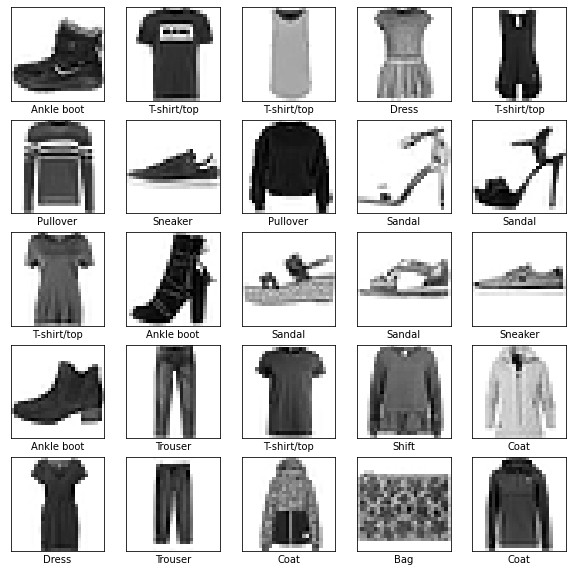

In [11]:
# 5x5로 꺼내서 한번 더 확인하자
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # x축 구분하는 그거 삭제
    plt.yticks([])
    plt.grid(False) # 여기까지 이미지가 들어갈 구역 설정
    plt.imshow(train_images[i], cmap=plt.cm.binary) # imshow부터 이미지. cmap 이미지색 흑백
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## 4 모델 구성
- 층 구성
- 컴파일

### 4-1 층 구성

In [12]:
# 1 (28 x 28) 2차원 배열을 1차원 배열로 변환
# 2 선형회귀
# 3 10개의 클래스 중 하나로 출력
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28, 28)), # 1
                             tf.keras.layers.Dense(128, activation = 'relu'), # 2
                             tf.keras.layers.Dense(10) # 3
])

### 4-2 모델 컴파일
- Optimizer: 모델이 업데이트 되는 방식
- loss function: 훈련 중 모델이 얼마나 정확한지 측정 (최소화해야하는 값)
- metrics=['accuracy']: 정확도 

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 5 모델 훈련
- 모델은 이미지와 레이블을 연결하는 방법 배움

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4937 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3709 - accuracy: 0.8668
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3320 - accuracy: 0.8794
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3096 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2917 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2769 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2651 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2556 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2451 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

### 정확도 평가
- 과적합: 모델 스스로가 학습한 데이터에 대해 평가 데이터에서보다 높은 정확도를 나타내는 것

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) # verbose는 0, 1, 2 (표시형식)
print("\n평가 데이터 정확도: 약 {:2.0f}%".format(test_acc*100))

313/313 - 1s - loss: 0.3362 - accuracy: 0.8859

평가 데이터 정확도: 약 89%


### 예측

In [16]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([1.7632274e-06, 8.7630059e-07, 2.9606737e-09, 4.1575614e-09,
       4.1246523e-07, 2.5284855e-04, 1.7474373e-07, 1.1989953e-01,
       6.2580398e-07, 8.7984377e-01], dtype=float32)

In [19]:
np.argmax(predictions[0]) # 최댓값. 가장 근접하다고 예측한 값

9

In [20]:
test_labels[0]

9

In [21]:
# 시각화1
def plot_image(i, predictions_array, true_label, img):
    # 이미지 틀
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    # 이미지
    plt.imshow(img, cmap=plt.cm.binary)

    # 레이블
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

# 시각화2
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])

    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

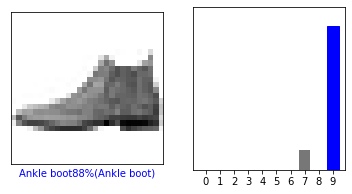

In [22]:
# 첫번째 이미지 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

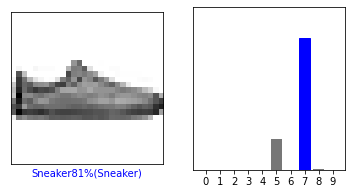

In [23]:
# 두번째 이미지 확인
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

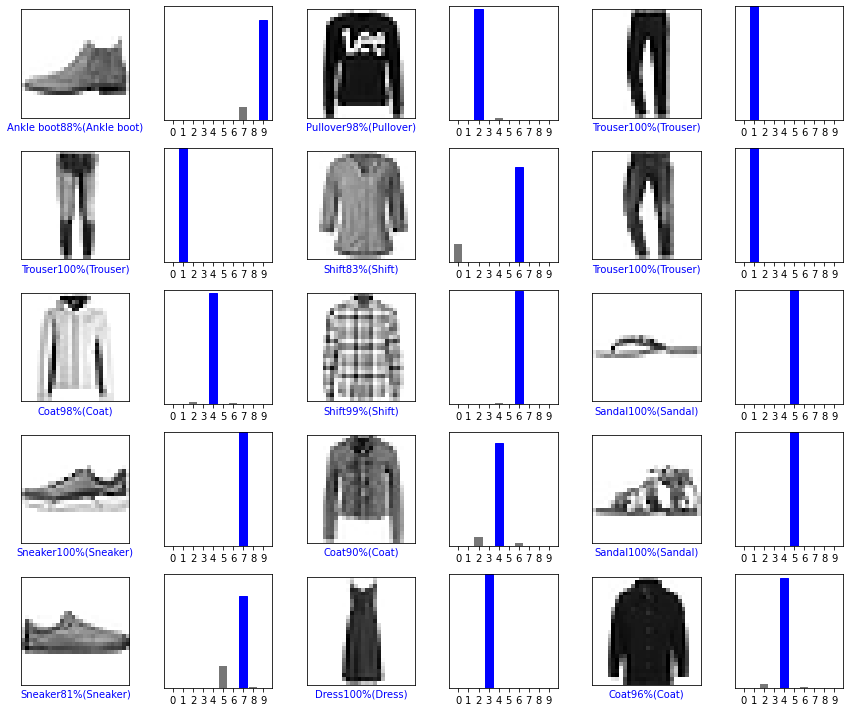

In [24]:
# 동시에 여러 이미지 확인
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 6 모델 사용

In [25]:
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.0879143e-06 3.5375427e-13 9.7849256e-01 8.3518983e-13 2.1455726e-02
  4.0976484e-12 4.9599883e-05 2.8683840e-19 2.5775963e-11 6.0768473e-17]]


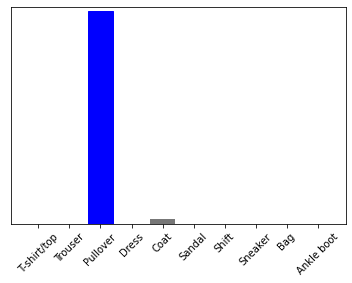

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
np.argmax(predictions_single[0])

2

## 7 회고